In [0]:
#IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, RandomForestRegressor, AdaBoostClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [0]:
#LOAD DATA
us_accident_data = pd.read_csv('./us_accident_data_pruned.csv')
us_accident_data = us_accident_data.drop(['Unnamed: 0'], axis=1)
us_accident_data.nunique().sort_values()

Astronomical_Twilight          2
Bump                           2
Crossing                       2
Give_Way                       2
Junction                       2
No_Exit                        2
Railway                        2
Nautical_Twilight              2
Roundabout                     2
Stop                           2
Traffic_Calming                2
Side                           2
Traffic_Signal                 2
Sunrise_Sunset                 2
Civil_Twilight                 2
Station                        2
Amenity                        2
Severity                       4
Timezone                       4
State                         49
Weather_Condition            120
County                      1687
Visibility(mi)              2226
Pressure(in)                2557
Temperature(F)              4408
Humidity(%)                 4564
Wind_Speed(mph)             6649
City                       11378
Zipcode                    20733
Start_Lng                 965414
Start_Lat 

In [0]:
us_accident_data.head(10)

,Severity,Start_Time,Start_Lat,Start_Lng,Side,City,County,State,Zipcode,Timezone,...,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,3.0,2016-02-08 00:46:00,39.865147,-84.058723,R,DAYTON,MONTGOMERY,OH,45424,EST,...,0.0,0.0,0.0,0.0,0.0,0.0,Night,Night,Night,Night
1,2.0,2016-02-08 01:07:59,39.928059,-82.831184,L,REYNOLDSBURG,FRANKLIN,OH,43068,EST,...,0.0,0.0,0.0,0.0,0.0,0.0,Night,Night,Night,Day
2,2.0,2016-02-08 01:49:27,39.063148,-84.032608,R,WILLIAMSBURG,CLERMONT,OH,45176,EST,...,0.0,0.0,0.0,0.0,0.0,1.0,Night,Night,Day,Day
3,3.0,2016-02-08 02:23:34,39.747753,-84.205582,R,DAYTON,MONTGOMERY,OH,45417,EST,...,0.0,0.0,0.0,0.0,0.0,0.0,Night,Day,Day,Day
4,2.0,2016-02-08 02:39:07,39.627781,-84.188354,R,DAYTON,MONTGOMERY,OH,45459,EST,...,0.0,0.0,0.0,0.0,0.0,1.0,Day,Day,Day,Day
5,3.0,2016-02-08 02:44:26,40.100590,-82.925194,R,WESTERVILLE,FRANKLIN,OH,43081,EST,...,0.0,0.0,0.0,0.0,0.0,0.0,Day,Day,Day,Day
6,2.0,2016-02-08 02:59:35,39.758274,-84.230507,R,DAYTON,MONTGOMERY,OH,45417,EST,...,0.0,0.0,0.0,0.0,0.0,0.0,Day,Day,Day,Day
7,3.0,2016-02-08 02:59:58,39.770382,-84.194901,R,DAYTON,MONTGOMERY,OH,45405,EST,...,0.0,0.0,0.0,0.0,0.0,0.0,Day,Day,Day,Day
8,2.0,2016-02-08 03:00:40,39.778061,-84.172005,L,DAYTON,MONTGOMERY,OH,45404,EST,...,0.0,0.0,0.0,0.0,0.0,0.0,Day,Day,Day,Day
9,3.0,2016-02-08 03:10:04,40.100590,-82.925194,R,WESTERVILLE,FRANKLIN,OH,43081,EST,...,0.0,0.0,0.0,0.0,0.0,0.0,Day,Day,Day,Day


In [0]:
us_accident_data['City'] = us_accident_data['State'] + '__' + us_accident_data['County'] + '__' + us_accident_data['City']
us_accident_data['County'] = us_accident_data['State'] + '__' + us_accident_data['County']

In [0]:
# PREPROCESING
us_accident_data.Zipcode = us_accident_data.Zipcode.astype(int)
us_accident_data = us_accident_data.replace([True, False], [1,0])
us_accident_data['Sunrise_Sunset'] = us_accident_data['Sunrise_Sunset'].replace(['Day', 'Night'], [1,-1])
us_accident_data['Civil_Twilight'] = us_accident_data['Civil_Twilight'].replace(['Day', 'Night'], [1,-1])
us_accident_data['Nautical_Twilight'] = us_accident_data['Nautical_Twilight'].replace(['Day', 'Night'], [1,-1])
us_accident_data['Astronomical_Twilight'] = us_accident_data['Astronomical_Twilight'].replace(['Day', 'Night'], [1,-1])
us_accident_data['Side'] = us_accident_data['Side'].replace(['R', 'L'], [1,-1])

In [0]:
# CONVERT START TIME TO SPECIFIC COLUMNS INFO
us_accident_data['Start_Time'] = pd.to_datetime(us_accident_data['Start_Time'], format = '%Y-%m-%dT%H:%M:%S')
us_accident_data['Year'] = us_accident_data['Start_Time'].dt.year
us_accident_data['Month'] = us_accident_data['Start_Time'].dt.month
us_accident_data['Week'] = us_accident_data['Start_Time'].dt.week
us_accident_data['Day'] = us_accident_data['Start_Time'].dt.day
us_accident_data['Hour'] = us_accident_data['Start_Time'].dt.hour
us_accident_data['Minute'] = us_accident_data['Start_Time'].dt.minute
us_accident_data = us_accident_data.drop(['Start_Time'], axis=1)

In [0]:
# WE CANNOT USE HOT ENCONDIG DUE TO RAM LIMITATION
# import labelencoder
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le_city = LabelEncoder()
le_city.fit(us_accident_data.City)
us_accident_data['City'] = le_city.transform(us_accident_data['City'])
le_county = LabelEncoder()
le_county.fit(us_accident_data.County)
us_accident_data['County'] = le_county.transform(us_accident_data['County'])
le_state = LabelEncoder()
le_state.fit(us_accident_data.State)
us_accident_data['State'] = le_state.transform(us_accident_data['State'])
le_timezone = LabelEncoder()
le_timezone.fit(us_accident_data.Timezone)
us_accident_data['Timezone'] = le_timezone.transform(us_accident_data['Timezone'])
le_weather = LabelEncoder()
le_weather.fit(us_accident_data.Weather_Condition)
us_accident_data['Weather_Condition'] = le_weather.transform(us_accident_data['Weather_Condition'])

In [0]:
cases_by_severity = {k:us_accident_data[us_accident_data.Severity == k] for k in set(us_accident_data.Severity)}
cases_by_severity_quantity = {k:len(cases_by_severity[k]) for k in cases_by_severity.keys()}
max_severity_quantity = max(cases_by_severity_quantity.values())
needed_to_normalize = {k:round(max_severity_quantity/v) - 1 for k,v in cases_by_severity_quantity.items()}
print(cases_by_severity_quantity)
print(needed_to_normalize)

{1.0: 947, 2.0: 1953141, 3.0: 864880, 4.0: 89354}
{1.0: 2061, 2.0: 0, 3.0: 1, 4.0: 21}


In [0]:
for k, times in needed_to_normalize.items():
    aux = cases_by_severity[k]
    if times > 0:
        i = 1
        while i * 2 < times:
            aux = aux.append(aux,ignore_index = True)
            i += i
        while i < times:
            aux = aux.append(cases_by_severity[k],ignore_index = True) 
            i += 1
        us_accident_data = us_accident_data.append(aux,ignore_index = True) 

In [0]:
cases_by_severity = {k:us_accident_data[us_accident_data.Severity == k] for k in set(us_accident_data.Severity)}
cases_by_severity_quantity = {k:len(cases_by_severity[k]) for k in cases_by_severity.keys()}
max_severity_quantity = max(cases_by_severity_quantity.values())
needed_to_normalize = {k:round(max_severity_quantity/v) - 1 for k,v in cases_by_severity_quantity.items()}
print(cases_by_severity_quantity)
print(needed_to_normalize)

{1.0: 1952714, 2.0: 1953141, 3.0: 1729760, 4.0: 1965788}
{1.0: 0, 2.0: 0, 3.0: 0, 4.0: 0}


In [0]:
# Set the target for the prediction
target='Severity'
y = us_accident_data[target]
X = us_accident_data.drop(target, axis=1)

# Split the data set into training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)
# List of classification algorithms

accuracy={}

In [0]:
### Random Forest
random_forest_clf = RandomForestClassifier(n_estimators=100, random_state=0, verbose=2, n_jobs=3)
random_forest_clf.fit(X_train, y_train)
y_pred_rf=random_forest_clf.predict(X_test)
acc_rf= accuracy_score(y_test, y_pred_rf)
print(acc_rf)

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.


building tree 1 of 100
building tree 2 of 100building tree 3 of 100

building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100


[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed: 11.2min


building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80

[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed: 32.0min finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:   19.3s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:   54.5s finished


0.9487450017463877


In [0]:
### Fast Trees
fast_trees_clf = ExtraTreesClassifier(n_estimators=100, random_state=0, verbose=2, n_jobs=3)
fast_trees_clf.fit(X_train, y_train)
y_pred_ft=fast_trees_clf.predict(X_test)
acc_ft= accuracy_score(y_test, y_pred_ft)
print(acc_ft)

In [0]:
# Adaboost Classifier
ada_clf = AdaBoostClassifier(n_estimators=100)
ada_clf.fit(X_train, y_train)
y_pred_ada=ada_clf.predict(X_test)
acc_ada= accuracy_score(y_test, y_pred_ada)
print(acc_ada)

0.4550546905473396


In [0]:
# Decision Tree
tc_clf = DecisionTreeClassifier(max_depth=30, criterion='entropy', random_state=1)
tc_clf.fit(X_train, y_train)
y_pred_tc= tc_clf.predict(X_test)
acc_tc = accuracy_score(y_test, y_pred_tc)
print(acc_tc)

0.9068757683612437


In [0]:
# Logistic Regression
lr_clf = LogisticRegression(random_state=0, verbose=2, n_jobs=3) # WITH L2 REGULATION
lr_clf.fit(X_train, y_train)
y_pred_lr=lr_clf.predict(X_test)
acc_lr= accuracy_score(y_test, y_pred_lr)
print(acc_lr)

[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   1 out of   1 | elapsed: 11.6min finished


0.30515411295674943


In [0]:
# Bagging
bg_clf = BaggingClassifier(n_estimators=100, n_jobs=3, verbose=2)
bg_clf.fit(X_train, y_train)
y_pred_bg= bg_clf.predict(X_test)
acc_bg = accuracy_score(y_test, y_pred_bg)
print(acc_bg)

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100building tree 5 of 100

building tree 6 of 100
building tree 7 of 100
building tree 8 of 100building tree 9 of 100

building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100


[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed: 11.1min


building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80

[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed: 32.2min finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:   19.4s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:   52.5s finished


0.9487450017463877


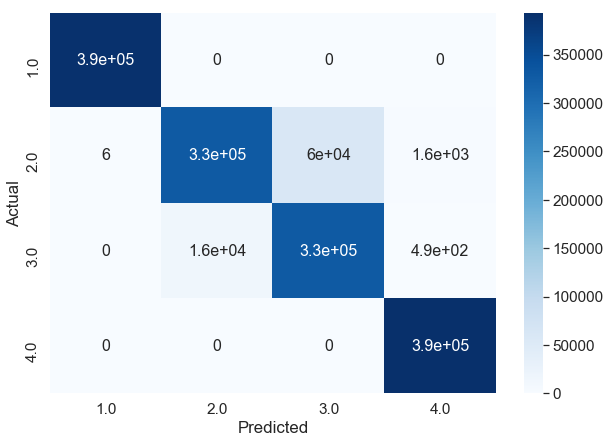

In [0]:
### Random Forest GRAPH
random_forest_clf = RandomForestClassifier(n_estimators=100, random_state=0, verbose=2, n_jobs=3)
random_forest_clf.fit(X_train, y_train)
y_pred_rf=random_forest_clf.predict(X_test)
acc_rf= accuracy_score(y_test, y_pred_rf)
print(acc_rf)


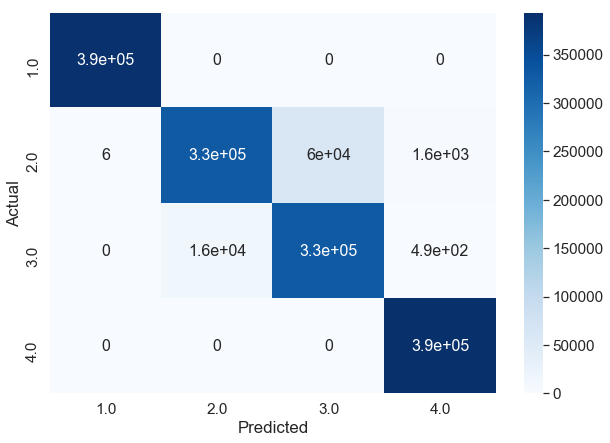

In [0]:
data = confusion_matrix(y_test, y_pred_rf)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

In [0]:
# Bagging
bg_clf = BaggingClassifier(n_estimators=100, n_jobs=3, verbose=2)
bg_clf.fit(X_train, y_train)
y_pred_bg= bg_clf.predict(X_test)
acc_bg = accuracy_score(y_test, y_pred_bg)
print(acc_bg)

[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed: 156.9min finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:  2.1min finished


0.9513484678161471


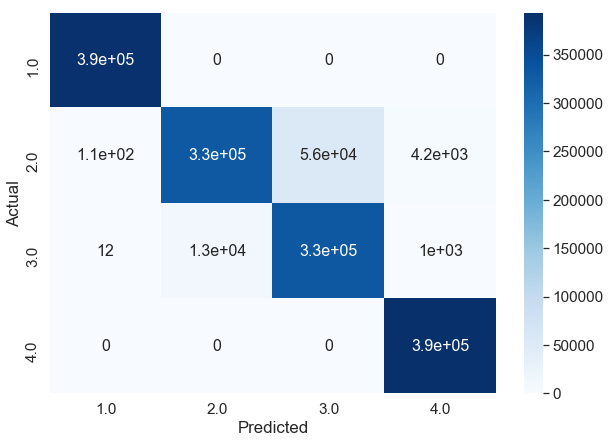

In [0]:
data = confusion_matrix(y_test, y_pred_bg)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size